# Predicting Coronary Heart Disease 
In 1948, scientists and participants embarked on an ambitious project to identify risk factors for heart disease. Today, the study remains a world-class epicenter for cuttingedge heart, brain, bone, and sleep research. The 10-year cardiovascular risk of an individual can be estimated with the Framingham Risk Score, including for individuals without known cardiovascular disease. The Framingham Risk Score is based on findings of the Framingham Heart Study. The goal is to build a classifier that can predict whether a person will get Coronary Heart Disease ten years in advance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("./data/framingham.csv")

## Study the data structure and summary – do we have missing values, outliers etc?

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Summary statistics
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [5]:
df.shape

(4240, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Thus, we have a relatively small dataset with 4240 rows, 15 features which can be used to sum up a person's cardiovascular health. The data is majorly numerical (integers and float values).

In [7]:
nullCols=[]
for col in df.columns:
    if df[col].isnull().sum()>0:
        nullCols.append(col)

We do have a few missing values in the columns `education`,`cigsPerDay`,`BPMeds`,`totChol`,`BMI`,`heartRate` and `glucose` 

<AxesSubplot:xlabel='cigsPerDay'>

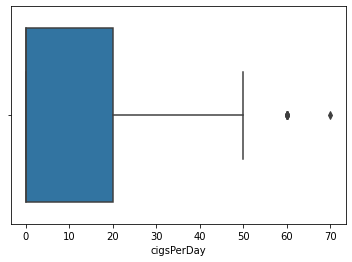

In [8]:
sns.boxplot(data=df,x='cigsPerDay')

In [9]:
def create_subplots(data ,plot):
    """
    Given the data and a callable, creates an appropriate number of subplots and displays it

    Args:
        data (Pandas DataFrame): A Pandas DataFrame from which the data is to be taken
        plot (callable): A seaborn callable that defines the type of plot
    """
    numberOfPlots=data.shape[1]
    fig,ax=plt.subplots(numberOfPlots//2,2,figsize=(10,10))
    for i in range(numberOfPlots//2):
        for j in range(2):
            axes=plot(ax=ax[i,j],data=data[data.columns[i*j]])
            axes.set(xlabel=data.columns[i*j])

In [10]:
continuous=["totChol","sysBP",'diaBP','BMI','heartRate','glucose','cigsPerDay']

### Detecting Outlier Presence

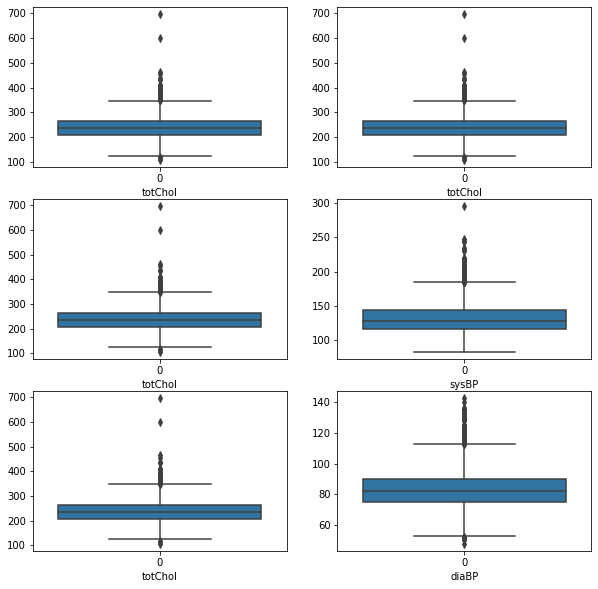

In [11]:
create_subplots(df[continuous],sns.boxplot)

The black dots in these plots represent outliers present in all the continuous features of the given dataset

### Treating Missing Values

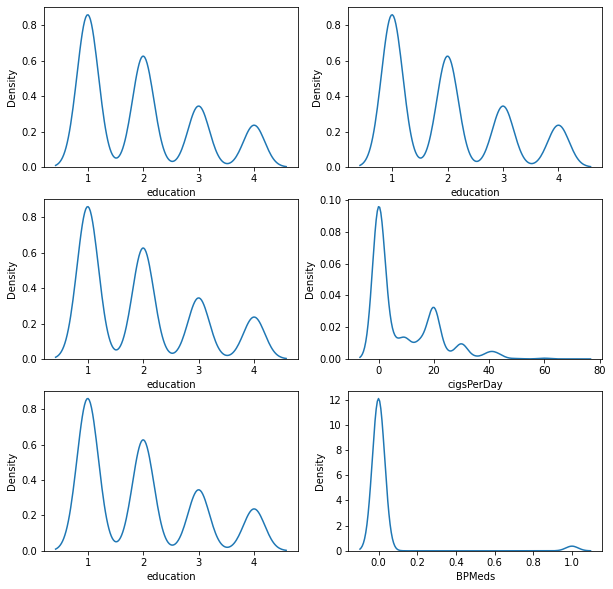

In [12]:
create_subplots(df[nullCols],sns.kdeplot)

In [13]:
df[nullCols].apply(np.var,axis=0)

education        1.039723
cigsPerDay     142.111340
BPMeds           0.028738
totChol       1987.908043
BMI             16.641152
heartRate      144.574880
glucose        573.661192
dtype: float64

Since the variance of almost all columns seems to be high, it makes sense to replace missing values with the median instead of the mean value

Education:  Some  High  School  (1),  High  School/GED 
(2), Some college/Vocational School (3), College (4) 

In [14]:
for col in nullCols:
    df[col]=df[col].fillna(df[col].median())

There is a high cahnce that an nan value implies that these are uneducated ppl, but it is also likely that the data was simply not complete

In [15]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## Split the data into Training set and Test set (65:35 ratio)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled=scaler.fit_transform(X=df.drop('TenYearCHD',axis=1))

In [18]:
scaled_df=pd.DataFrame(scaled,columns=df.columns[:-1])

In [19]:
scaled_df['TenYearCHD']=df['TenYearCHD']

In [20]:
scaled_df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.149406,0.106383,0.232804,0.277024,0.363636,0.104520,0
1,0.0,0.368421,0.333333,0.0,0.000000,0.0,0.0,0.0,0.0,0.242784,0.177305,0.349206,0.319680,0.515152,0.101695,0
2,1.0,0.421053,0.000000,1.0,0.285714,0.0,0.0,0.0,0.0,0.234295,0.208038,0.338624,0.237518,0.313131,0.084746,0
3,0.0,0.763158,0.666667,1.0,0.428571,0.0,0.0,1.0,0.0,0.200340,0.314421,0.497354,0.316045,0.212121,0.177966,1
4,0.0,0.368421,0.666667,1.0,0.328571,0.0,0.0,0.0,0.0,0.302207,0.219858,0.380952,0.183228,0.414141,0.127119,0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df.drop('TenYearCHD', axis=1),
                                                    scaled_df['TenYearCHD'],
                                                    test_size=0.35,
                                                    random_state=42)


## Create a logistic regression model using all variables

In [22]:
from sklearn.linear_model import LogisticRegression


In [23]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [24]:
prediction=lr.predict(X_test)

In [25]:
from sklearn.metrics import classification_report

In [26]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1264
           1       0.67      0.07      0.13       220

    accuracy                           0.86      1484
   macro avg       0.76      0.53      0.53      1484
weighted avg       0.83      0.86      0.80      1484

